# Importing libraries

In [1]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
!pip install scikit learn==1.3.0

ERROR: Could not find a version that satisfies the requirement scikit (from versions: none)
ERROR: No matching distribution found for scikit


# Loading Dataset

In [4]:
df=pd.read_csv('IRIS.csv')
df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
#basic stats
df.describe()


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

# Data preprocessing

In [9]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

# Data Analysis

<Axes: >

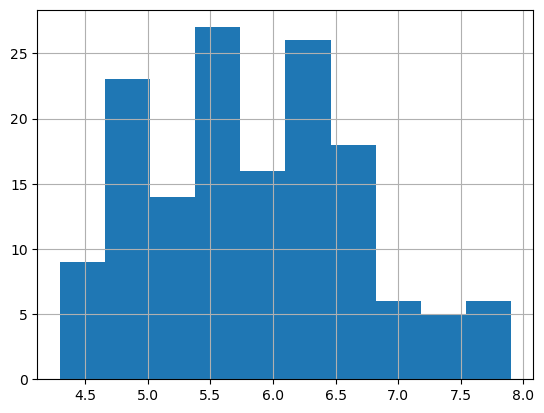

In [10]:
df['sepal_length'].hist()

<Axes: >

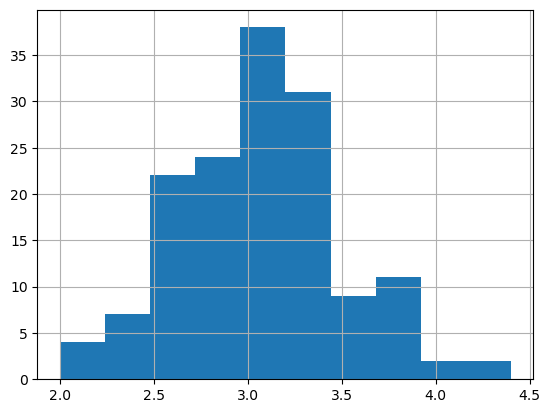

In [11]:
df['sepal_width'].hist()

<Axes: >

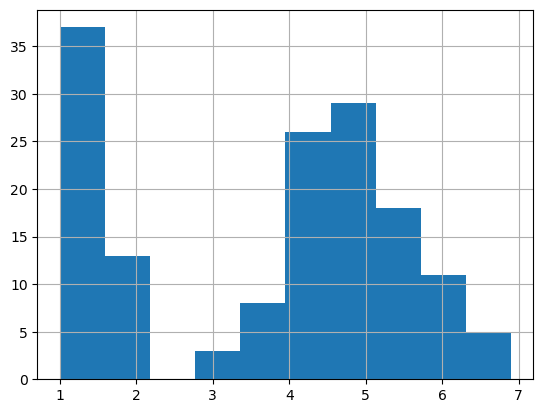

In [12]:
df['petal_length'].hist()

<Axes: >

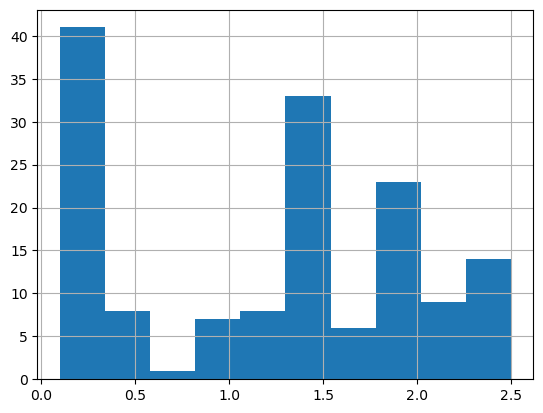

In [13]:
df['petal_width'].hist()

In [15]:
#create a list of colors and class
colors=['red','orange','blue']
species =['virginica','versicolor','setosa']

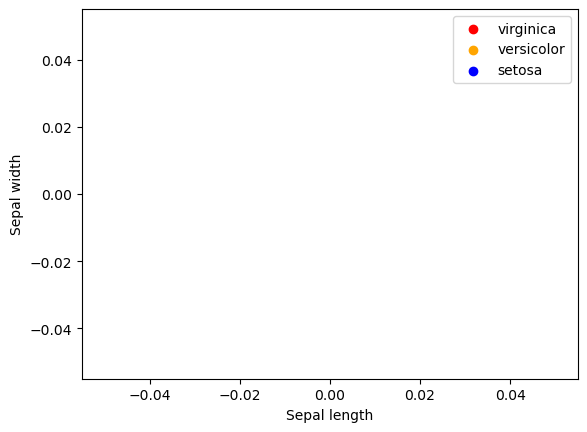

In [21]:
for i in range(3):
    x = df[df['species']== species[i]]
    plt.scatter(x['sepal_length'],x['sepal_width'],c=colors[i],label=species[i])
    plt.xlabel("Sepal length")
    plt.ylabel("Sepal width")
    plt.legend()
    

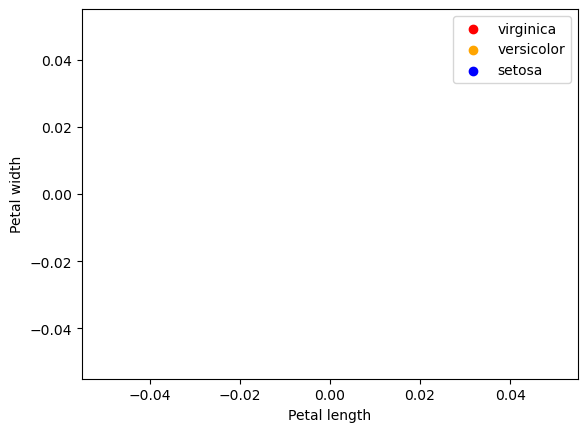

In [19]:
for i in range(3):
    x = df[df['species']== species[i]]
    plt.scatter(x['petal_length'],x['petal_width'],c=colors[i],label=species[i])
    plt.xlabel("Petal length")
    plt.ylabel("Petal width")
    plt.legend()

In [22]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


<Axes: >

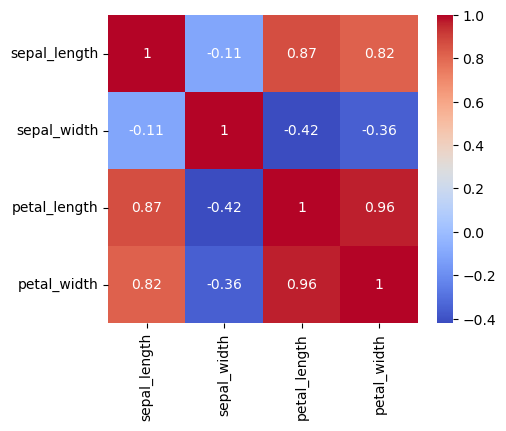

In [23]:
corr=df.corr()
fig,ax=plt.subplots(figsize=(5,4))
sns.heatmap(corr,annot=True,ax=ax,cmap='coolwarm')
       

# Model Training and Testing

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import pickle

X=df.drop(columns=['species'])
Y=df['species']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.30)

In [37]:
from sklearn.linear_model import LogisticRegression

# Create the logistic regression model
model = LogisticRegression()

# Train the model
model.fit(x_train, y_train)

# Print the accuracy
print("Logistic Regression Accuracy: {:.2f}%".format(model.score(x_test, y_test) * 100))


Logistic Regression Accuracy: 97.78%


In [38]:
model.fit(x_train.values,y_train.values)

LogisticRegression()

In [40]:
print("Accuracy:", model.score(x_test,y_test)*100)

Accuracy: 97.77777777777777


In [41]:
model=KNeighborsClassifier()
model.fit(x_train.values,y_train.values)
print("Accuracy of model: ", model.score(x_test,y_test)*100)

Accuracy of model:  100.0


In [42]:
print("Accuracy of model: ", model.score(x_test,y_test)*100)

Accuracy of model:  100.0


In [43]:
model=DecisionTreeClassifier()
model.fit(x_train.values,y_train.values)
print("Accuracy of model: ", model.score(x_test,y_test)*100)

Accuracy of model:  97.77777777777777


In [44]:
print("Accuracy of model: ", model.score(x_test,y_test)*100)

Accuracy of model:  97.77777777777777


In [45]:
import pickle

In [46]:
filename='saved_model.sav'
try:
    with open(filename, 'wb')as file:
        pickle.dump(model,file)
    print('Model saved successfully')
except Exception as e:
    print(f"Error saving the model: (e)")

Model saved successfully


In [47]:
load_model = pickle.load(open(filename,'rb'))


In [48]:
load_model.predict([[6.0,2.2,4.0,1.0]])

array(['Iris-versicolor'], dtype=object)

In [49]:
import sklearn
print(sklearn.__version__)

1.3.0


In [50]:
x_test.head()

,sepal_length,sepal_width,petal_length,petal_width
21,5.1,3.7,1.5,0.4
73,6.1,2.8,4.7,1.2
91,6.1,3.0,4.6,1.4
148,6.2,3.4,5.4,2.3
16,5.4,3.9,1.3,0.4


In [52]:
load_model.predict([[4,3,1,5]])

array(['Iris-setosa'], dtype=object)